# Plantilla: Proyecto
## Tema 2: Clasificación de barrios en función de su tipología.
Documento plantilla para el proyecto con los imports de las librerias más importantes.

In [1]:
import nltk                      # Natural Language Toolkit
import scrapy                    # Web scraping  
import requests                  # HTTP requests
import selenium                  # Web automation
import numpy as np               # Numerical computing
import pandas as pd              # Data manipulation
import seaborn as sns            # Data visualization
import tensorflow as tf          # Machine learning
import matplotlib.pyplot as plt  # Data visualization

from bs4 import BeautifulSoup    # HTML parsing

In [2]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
df_seguridad = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.19.1', header=8)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_seguridad.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_seguridad.rename(columns={'Unnamed: 15':'Seguridad'}, inplace=True)
df_seguridad.rename(columns={'Unnamed: 16':'Desviación'}, inplace=True)
df_seguridad.rename(columns={'Unnamed: 17':'Mediana'}, inplace=True)
#eliminar las columans 1 a 14
df_seguridad = df_seguridad.drop(df_seguridad.columns[1:15], axis=1)
df_seguridad = df_seguridad.drop(df_seguridad.columns[2:], axis=1)

df_seguridad['Seguridad'] = df_seguridad['Seguridad']/10
df_seguridad


,Distrito,Seguridad
0,Total,0.675763
1,1. Ciutat Vella,0.715789
2,2. l'Eixample,0.741270
3,3. Extramurs,0.754198
4,4. Campanar,0.699153
5,5. la Saïdia,0.535156
6,6. el Pla del Real,0.745299
7,7. l'Olivereta,0.668462
8,8. Patraix,0.734559
9,9. Jesús,0.672932


In [4]:
df_discrimin = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.31.1', header=8)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_discrimin.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_discrimin.rename(columns={' Sí':'Discriminacion'}, inplace=True)
#elimino la última columna que no tiene datos
df_discrimin = df_discrimin.iloc[:, :-1]
df_discrimin = df_discrimin.drop(df_discrimin.columns[2:], axis=1)
df_discrimin['Discriminacion'] = df_discrimin['Discriminacion']/100
df_discrimin


,Distrito,Discriminacion
0,Total,0.135579
1,1. Ciutat Vella,0.149123
2,2. l'Eixample,0.150794
3,3. Extramurs,0.152672
4,4. Campanar,0.152542
5,5. la Saïdia,0.109375
6,6. el Pla del Real,0.136752
7,7. l'Olivereta,0.215385
8,8. Patraix,0.139706
9,9. Jesús,0.067669


In [5]:
df_extranjer = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.36', header=7)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_extranjer.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
# añadir una columna que sea: "true Valencia" y condensar en ella las columnas 2 y 3 en una sola que sume los valores por fila
df_extranjer['Españoles'] = df_extranjer.iloc[:, 1] + df_extranjer.iloc[:, 2] + df_extranjer.iloc[:, 3] + df_extranjer.iloc[:, 4]
# añadir una columna que sea: "Extranjeros" y condensar en ella las columnas 4, 5 y 6 en una sola que sume los valores por fila
df_extranjer['Extranjeros'] = df_extranjer.iloc[:, 5] 
# Eliminar las columnas 2 a 8
df_extranjer = df_extranjer.drop(df_extranjer.columns[1:9], axis=1)
#eliminar columna 1 y 3
df_extranjer = df_extranjer.drop(df_extranjer.columns[1], axis=1)
df_extranjer['Extranjeros'] = df_extranjer['Extranjeros']/100
df_extranjer


,Distrito,Extranjeros
0,Total,0.183847
1,1. Ciutat Vella,0.140351
2,2. l'Eixample,0.055556
3,3. Extramurs,0.152672
4,4. Campanar,0.177966
5,5. la Saïdia,0.242188
6,6. el Pla del Real,0.000000
7,7. l'Olivereta,0.230769
8,8. Patraix,0.308824
9,9. Jesús,0.218045


In [6]:
df_op_politi  = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.37', header=8)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_op_politi.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_op_politi.rename(columns={'Unnamed: 14':'Política'}, inplace=True)
df_op_politi.rename(columns={'Unnamed: 15':'Desviación'}, inplace=True)
df_op_politi.rename(columns={'Unnamed: 16':'Mediana'}, inplace=True)
#eliminar las columans 1 a 13
df_op_politi = df_op_politi.drop(df_op_politi.columns[1:14], axis=1)
df_op_politi = df_op_politi.drop(df_op_politi.columns[2:], axis=1)
df_op_politi['Política'] = df_op_politi['Política']/10
df_op_politi

,Distrito,Política
0,Total,0.534791
1,1. Ciutat Vella,0.593814
2,2. l'Eixample,0.638938
3,3. Extramurs,0.562037
4,4. Campanar,0.533708
5,5. la Saïdia,0.516071
6,6. el Pla del Real,0.724138
7,7. l'Olivereta,0.476106
8,8. Patraix,0.521774
9,9. Jesús,0.500000


In [7]:
df_s_laboral  = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.39', header=7)
# cambiar el nombre de la primera columna que hace de header a 'Distrito':
df_s_laboral.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
# Remombrar la segunda columna como "Empleados" (acceder a ella por indice)
df_s_laboral.rename(columns={df_s_laboral.columns[1]:'Empleados'}, inplace=True)
df_s_laboral.rename(columns={' Estudiante':'Estudiantes'}, inplace=True)
# Crear columna Extra llamada "parados_b" que sea la suma de las columnas 2 y 3
df_s_laboral['Desempleados'] = df_s_laboral.iloc[:, 2] + df_s_laboral.iloc[:, 3]
#eliminar columnas 2 y 3
df_s_laboral = df_s_laboral.drop(df_s_laboral.columns[2:4], axis=1)
#eliminar columnas 3, 4 5 y 6
df_s_laboral = df_s_laboral.drop(df_s_laboral.columns[3:7], axis=1)
df_s_laboral['Desempleados'] = df_s_laboral['Desempleados']/100
df_s_laboral['Empleados'] = df_s_laboral['Empleados']/100
df_s_laboral['Estudiantes'] = df_s_laboral['Estudiantes']/100
df_s_laboral


#df_extranjer['Españoles'] = df_extranjer.iloc[:, 1] + df_extranjer.iloc[:, 2]

,Distrito,Empleados,Estudiantes,Desempleados
0,Total,0.506947,0.081897,0.077091
1,1. Ciutat Vella,0.570175,0.166667,0.052632
2,2. l'Eixample,0.507937,0.087302,0.055556
3,3. Extramurs,0.534351,0.061069,0.053435
4,4. Campanar,0.516949,0.067797,0.059322
5,5. la Saïdia,0.492188,0.070312,0.078125
6,6. el Pla del Real,0.487179,0.273504,0.034188
7,7. l'Olivereta,0.507692,0.046154,0.092308
8,8. Patraix,0.470588,0.051471,0.095588
9,9. Jesús,0.481203,0.067669,0.090226


In [8]:
df_ingresos = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.43', header=8)
df_ingresos.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)

medias = [0, 250, 750, 1250, 2000, 3750, 6000]

# Calcular el valor esperado de los ingresos. Para cada fila, multiplicar cada valor de la columna [i] (a partir de la 1) por el valor de medias[i] y sumarlo
df_ingresos['Ingresos Mes'] = sum([df_ingresos.iloc[:, i] * medias[i]/100 for i in range(1, 7)])

#eliminar las columnas 1 a 10
df_ingresos = df_ingresos.drop(df_ingresos.columns[1:11], axis=1)

# cambiar el valor de la media de la fila 5 por 2100
df_ingresos.iloc[5, 1] = 2100
df_ingresos.iloc[18,1]= 1750



df_ingresos


,Distrito,Ingresos Mes
0,Total,1875.070412
1,1. Ciutat Vella,2741.228070
2,2. l'Eixample,1908.730159
3,3. Extramurs,2022.900763
4,4. Campanar,993.644068
5,5. la Saïdia,2100.000000
6,6. el Pla del Real,2525.641026
7,7. l'Olivereta,2275.000000
8,8. Patraix,3200.367647
9,9. Jesús,1979.323308


In [9]:

df_ingresos_rel = df_ingresos.copy()
df_ingresos_rel['Ingresos Mes REL'] = df_ingresos_rel['Ingresos Mes']/10000
df_ingresos_rel.drop(df_ingresos_rel.columns[1], axis=1, inplace=True)
df_ingresos_rel

,Distrito,Ingresos Mes REL
0,Total,0.187507
1,1. Ciutat Vella,0.274123
2,2. l'Eixample,0.190873
3,3. Extramurs,0.202290
4,4. Campanar,0.099364
5,5. la Saïdia,0.210000
6,6. el Pla del Real,0.252564
7,7. l'Olivereta,0.227500
8,8. Patraix,0.320037
9,9. Jesús,0.197932


In [10]:
#exportar el dataframe df_ingresos a un archivo csv
df_ingresos.to_csv('docs_Carlos/df_ingresos.csv', index=False)


In [11]:
# Porcentaje de poblacción que lleva viviendo en el mismo distrito más de 5 años

df_permanencia = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.0', header=7)
df_permanencia.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_permanencia.rename(columns={' Más de 5 años':'AntRes_5y'}, inplace=True)

#eliminar las columnas 1 a 10
df_permanencia = df_permanencia.drop(df_permanencia.columns[1:4], axis=1)
df_permanencia = df_permanencia.drop(df_permanencia.columns[2:], axis=1)
df_permanencia['AntRes_5y'] = df_permanencia['AntRes_5y']/100
df_permanencia



,Distrito,AntRes_5y
0,Total,0.765354
1,1. Ciutat Vella,0.684211
2,2. l'Eixample,0.857143
3,3. Extramurs,0.778626
4,4. Campanar,0.694915
5,5. la Saïdia,0.804688
6,6. el Pla del Real,0.649573
7,7. l'Olivereta,0.776923
8,8. Patraix,0.676471
9,9. Jesús,0.812030


In [12]:
df_satisfacc = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.3', header=8)
df_satisfacc.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_satisfacc.rename(columns={'Unnamed: 15':'Satisfaccion'}, inplace=True)

df_satisfacc = df_satisfacc.drop(df_satisfacc.columns[1:15], axis=1)
df_satisfacc = df_satisfacc.drop(df_satisfacc.columns[2:], axis=1)
df_satisfacc['Satisfaccion'] = df_satisfacc['Satisfaccion']/10
df_satisfacc


,Distrito,Satisfaccion
0,Total,0.821059
1,1. Ciutat Vella,0.791228
2,2. l'Eixample,0.796032
3,3. Extramurs,0.835115
4,4. Campanar,0.845763
5,5. la Saïdia,0.896094
6,6. el Pla del Real,0.747863
7,7. l'Olivereta,0.845385
8,8. Patraix,0.757353
9,9. Jesús,0.841353


In [13]:
df_pr_situ_econo = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name='P.6', header=7)

df_pr_situ_econo.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
#cambiar nombre de la columna 1 a 'Buena Situación económica'
df_pr_situ_econo.rename(columns={'La mala situación económica y la inflación':'Precariedad Econo'}, inplace=True)
df_pr_situ_econo = df_pr_situ_econo.drop(df_pr_situ_econo.columns[2:], axis=1)

df_pr_situ_econo['Precariedad Econo'] = df_pr_situ_econo['Precariedad Econo']/100
df_pr_situ_econo

,Distrito,Precariedad Econo
0,Total,0.166817
1,1. Ciutat Vella,0.149123
2,2. l'Eixample,0.119048
3,3. Extramurs,0.091603
4,4. Campanar,0.161017
5,5. la Saïdia,0.265625
6,6. el Pla del Real,0.085470
7,7. l'Olivereta,0.184615
8,8. Patraix,0.117647
9,9. Jesús,0.180451


In [14]:
df_pr_acceso_casa = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name='P.6', header=7)

df_pr_acceso_casa.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_pr_acceso_casa.rename(columns={'El acceso a la vivienda / escasa oferta / precio alquiler':'Prob Vivienda'}, inplace=True)
df_pr_acceso_casa = df_pr_acceso_casa.drop(df_pr_acceso_casa.columns[1:3], axis=1)
df_pr_acceso_casa = df_pr_acceso_casa.drop(df_pr_acceso_casa.columns[2:], axis=1)
df_pr_acceso_casa['Prob Vivienda'] = df_pr_acceso_casa['Prob Vivienda']/100
df_pr_acceso_casa

,Distrito,Prob Vivienda
0,Total,0.070282
1,1. Ciutat Vella,0.096491
2,2. l'Eixample,0.015873
3,3. Extramurs,0.038168
4,4. Campanar,0.118644
5,5. la Saïdia,0.031250
6,6. el Pla del Real,0.000000
7,7. l'Olivereta,0.092308
8,8. Patraix,0.095588
9,9. Jesús,0.075188


In [15]:
df_recogida_basura = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.7.1.1', header=9)  
df_recogida_basura.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_recogida_basura.rename(columns={'Unnamed: 15':'Limpieza'}, inplace=True)
df_recogida_basura = df_recogida_basura.drop(df_recogida_basura.columns[1:15], axis=1)
df_recogida_basura = df_recogida_basura.drop(df_recogida_basura.columns[2:], axis=1)
df_recogida_basura['Limpieza'] = df_recogida_basura['Limpieza']/10
df_recogida_basura

,Distrito,Limpieza
0,Total,0.573540
1,1. Ciutat Vella,0.531579
2,2. l'Eixample,0.622222
3,3. Extramurs,0.586260
4,4. Campanar,0.599153
5,5. la Saïdia,0.382031
6,6. el Pla del Real,0.644444
7,7. l'Olivereta,0.636923
8,8. Patraix,0.503676
9,9. Jesús,0.642105


In [16]:
df_trafico = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.1', header=8)

df_trafico.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_trafico.rename(columns={' Más de una vez':'Frec Acc Coche'}, inplace=True)
df_trafico = df_trafico.drop(df_trafico.columns[2:], axis=1)
df_trafico['Frec Acc Coche'] = df_trafico['Frec Acc Coche']/100
df_trafico



,Distrito,Frec Acc Coche
0,Total,0.129150
1,1. Ciutat Vella,0.157895
2,2. l'Eixample,0.071429
3,3. Extramurs,0.175573
4,4. Campanar,0.118644
5,5. la Saïdia,0.242188
6,6. el Pla del Real,0.282051
7,7. l'Olivereta,0.069231
8,8. Patraix,0.088235
9,9. Jesús,0.120301


In [17]:
df_prostis = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.4', header=8)
df_prostis.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_prostis['Frec Prostitucion'] = df_prostis.iloc[:, 1] + df_prostis.iloc[:, 2]
df_prostis = df_prostis.drop(df_prostis.columns[1:7], axis=1)

df_prostis['Frec Prostitucion'] = df_prostis['Frec Prostitucion']/100
df_prostis

,Distrito,Frec Prostitucion
0,Total,0.115051
1,1. Ciutat Vella,0.289474
2,2. l'Eixample,0.119048
3,3. Extramurs,0.083969
4,4. Campanar,0.093220
5,5. la Saïdia,0.039062
6,6. el Pla del Real,0.247863
7,7. l'Olivereta,0.084615
8,8. Patraix,0.397059
9,9. Jesús,0.060150


In [18]:
df_peleasjovenes = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.5', header=8)
df_peleasjovenes.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_peleasjovenes['Frec Peleas Jov'] = df_peleasjovenes.iloc[:, 1] + df_peleasjovenes.iloc[:, 2]
df_peleasjovenes = df_peleasjovenes.drop(df_peleasjovenes.columns[1:6], axis=1)
df_peleasjovenes['Frec Peleas Jov'] = df_peleasjovenes['Frec Peleas Jov']/100
df_peleasjovenes

,Distrito,Frec Peleas Jov
0,Total,0.503282
1,1. Ciutat Vella,0.508772
2,2. l'Eixample,0.515873
3,3. Extramurs,0.328244
4,4. Campanar,0.355932
5,5. la Saïdia,0.695312
6,6. el Pla del Real,0.786325
7,7. l'Olivereta,0.446154
8,8. Patraix,0.514706
9,9. Jesús,0.443609


In [19]:
df_drogas = pd.read_excel('docs_Carlos/Distritos23.xlsx', sheet_name=' P.15.6', header=8)
df_drogas.rename(columns={'Unnamed: 0':'Distrito'}, inplace=True)
df_drogas['Frec Pres Drogas'] = df_drogas.iloc[:, 1] + df_drogas.iloc[:, 2]
df_drogas = df_drogas.drop(df_drogas.columns[1:6], axis=1)
df_drogas['Frec Pres Drogas'] = df_drogas['Frec Pres Drogas']/100
df_drogas

,Distrito,Frec Pres Drogas
0,Total,0.634716
1,1. Ciutat Vella,0.508772
2,2. l'Eixample,0.619048
3,3. Extramurs,0.419847
4,4. Campanar,0.635593
5,5. la Saïdia,0.632812
6,6. el Pla del Real,0.675214
7,7. l'Olivereta,0.692308
8,8. Patraix,0.742647
9,9. Jesús,0.571429


In [20]:
# Juntamos todos los dataframes en uno solo. Unimos por por la columna ´Distrito´

df = pd.merge(df_seguridad, df_discrimin, on='Distrito')
df = pd.merge(df, df_extranjer, on='Distrito')
df = pd.merge(df, df_op_politi, on='Distrito')
df = pd.merge(df, df_s_laboral, on='Distrito')
df = pd.merge(df, df_ingresos_rel, on='Distrito')
df = pd.merge(df, df_permanencia, on='Distrito')
df = pd.merge(df, df_satisfacc, on='Distrito')
df = pd.merge(df, df_pr_situ_econo, on='Distrito')
df = pd.merge(df, df_pr_acceso_casa, on='Distrito')
df = pd.merge(df, df_recogida_basura, on='Distrito')
df = pd.merge(df, df_trafico, on='Distrito')
df = pd.merge(df, df_prostis, on='Distrito')
df = pd.merge(df, df_peleasjovenes, on='Distrito')
df = pd.merge(df, df_drogas, on='Distrito')

#eliminamos la primera fila que corresponde a total
df = df.drop(df.index[0])
# Los valores de la columna ´Distrito´ son de tipo string. Los ponemos en minúsculas y sin tildes. Eliminamos los números y los puntos
df['Distrito'] = df['Distrito'].str.lower()
df['Distrito'] = df['Distrito'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#eliminamos los caracteres numéricos de la primera columna (Distrito) df.iloc[0,0] = df.iloc[0,0][1:] para todos los elementos de la primer columna
for i in range(9):
    df.iloc[i, 0] = df.iloc[i, 0][2:]

for i in range(10, 19):
    df.iloc[i, 0] = df.iloc[i, 0][3:]

df

,Distrito,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,Satisfaccion,Precariedad Econo,Prob Vivienda,Limpieza,Frec Acc Coche,Frec Prostitucion,Frec Peleas Jov,Frec Pres Drogas
1,ciutat vella,0.715789,0.149123,0.140351,0.593814,0.570175,0.166667,0.052632,0.274123,0.684211,0.791228,0.149123,0.096491,0.531579,0.157895,0.289474,0.508772,0.508772
2,l'eixample,0.741270,0.150794,0.055556,0.638938,0.507937,0.087302,0.055556,0.190873,0.857143,0.796032,0.119048,0.015873,0.622222,0.071429,0.119048,0.515873,0.619048
3,extramurs,0.754198,0.152672,0.152672,0.562037,0.534351,0.061069,0.053435,0.202290,0.778626,0.835115,0.091603,0.038168,0.586260,0.175573,0.083969,0.328244,0.419847
4,campanar,0.699153,0.152542,0.177966,0.533708,0.516949,0.067797,0.059322,0.099364,0.694915,0.845763,0.161017,0.118644,0.599153,0.118644,0.093220,0.355932,0.635593
5,la saidia,0.535156,0.109375,0.242188,0.516071,0.492188,0.070312,0.078125,0.210000,0.804688,0.896094,0.265625,0.031250,0.382031,0.242188,0.039062,0.695312,0.632812
6,el pla del real,0.745299,0.136752,0.000000,0.724138,0.487179,0.273504,0.034188,0.252564,0.649573,0.747863,0.085470,0.000000,0.644444,0.282051,0.247863,0.786325,0.675214
7,l'olivereta,0.668462,0.215385,0.230769,0.476106,0.507692,0.046154,0.092308,0.227500,0.776923,0.845385,0.184615,0.092308,0.636923,0.069231,0.084615,0.446154,0.692308
8,patraix,0.734559,0.139706,0.308824,0.521774,0.470588,0.051471,0.095588,0.320037,0.676471,0.757353,0.117647,0.095588,0.503676,0.088235,0.397059,0.514706,0.742647
9,jesus,0.672932,0.067669,0.218045,0.500000,0.481203,0.067669,0.090226,0.197932,0.812030,0.841353,0.180451,0.075188,0.642105,0.120301,0.060150,0.443609,0.571429
10,10. quatre carreres,0.700680,0.163265,0.190476,0.462069,0.517007,0.068027,0.102041,0.309354,0.802721,0.816327,0.204082,0.102041,0.491837,0.095238,0.095238,0.571429,0.734694


In [21]:
df_copy= df.copy()
df_copy.drop(['Distrito'], axis=1, inplace=True)
df_corr= df_copy.corr()

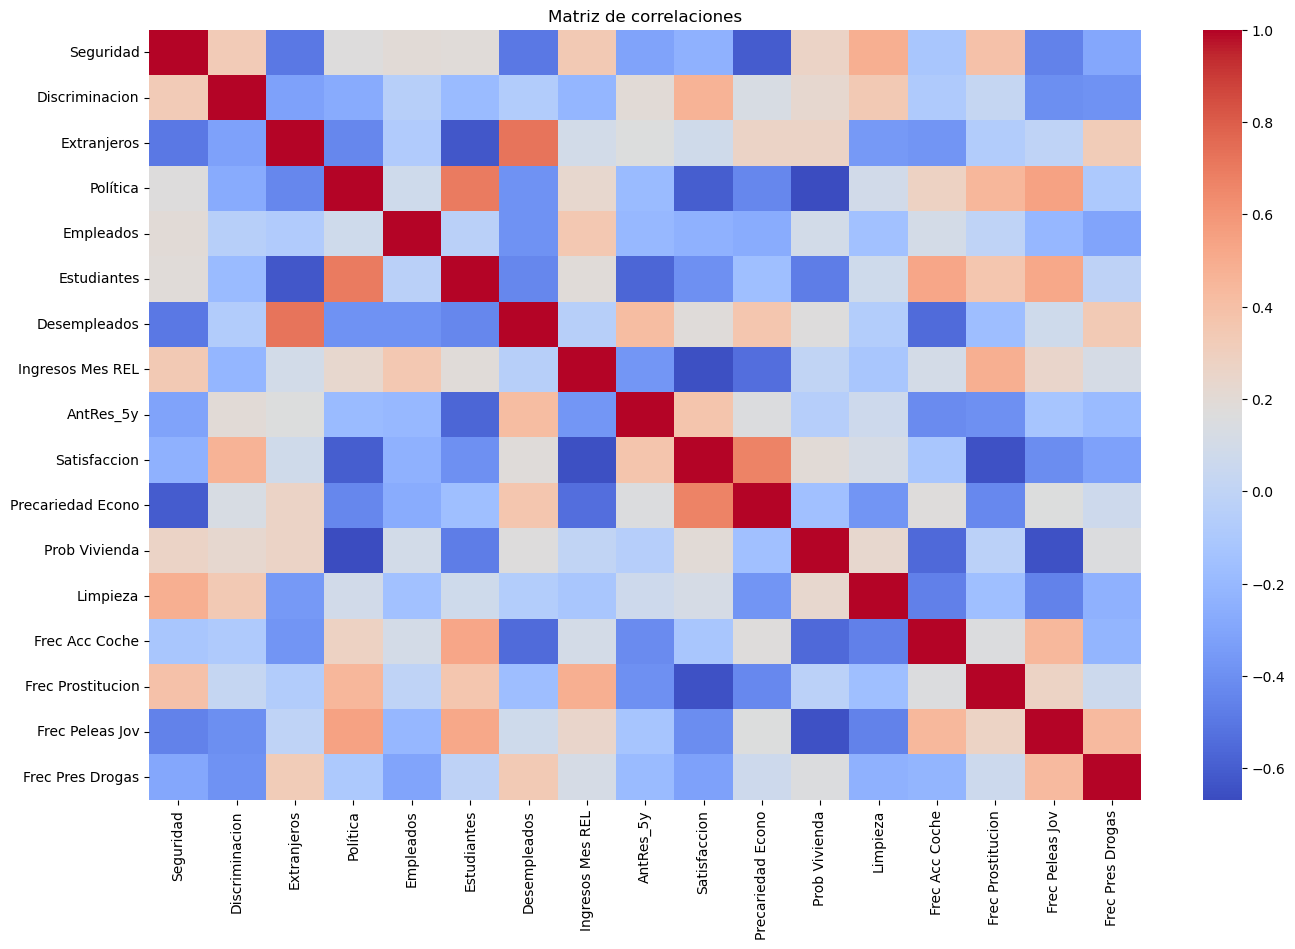

In [22]:

# 3. Visualizaciones

# Matriz de correlaciones
plt.figure(figsize=(16, 10))
sns.heatmap(df_corr, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlaciones')
plt.show()


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

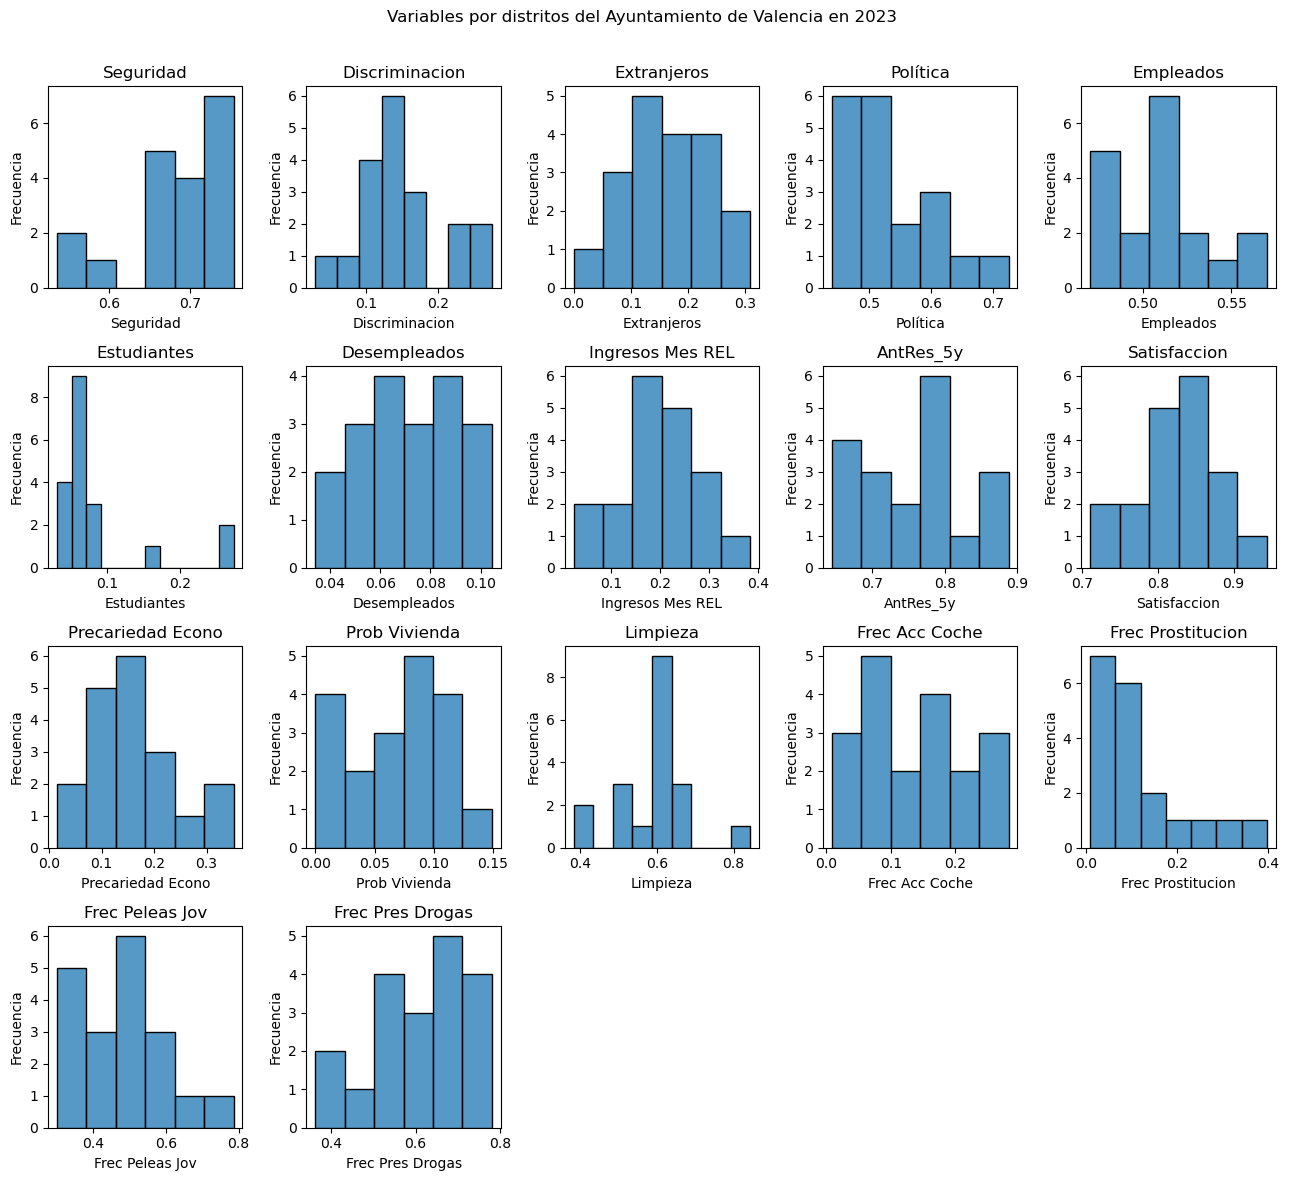

In [23]:
def plot_histograms(df, title=None, n_cols=5):
    n_variables = len(df.columns)
    n_rows = int(n_variables / n_cols) if n_variables % n_cols == 0 else int(n_variables / n_cols) + 1
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(13, 3 * n_rows))
    axs = axs.flatten()
    
    for i, variable in enumerate(df.columns[1:]):
        valores = df[variable]
        sns.histplot(valores, ax=axs[i])
        
        axs[i].set_xlabel(variable)
        axs[i].set_ylabel('Frecuencia')
        
        if title is None:
            axs[i].set_title(f'{variable}')
        else:
            axs[i].set_title(title)

    # Calculate the number of empty subplots
    empty_subplots = n_rows * n_cols - n_variables+1

    # Remove all empty subplots
    for empty_subplot in range(empty_subplots):
        fig.delaxes(axs[-(empty_subplot + 1)])
        
    plt.suptitle('Variables por distritos del Ayuntamiento de Valencia en 2023 \n \n')
    # modificar tamaño suptitle
    
    #quitar el grid
    plt.grid(False)
    plt.tight_layout()
    plt.show()


plot_histograms(df)


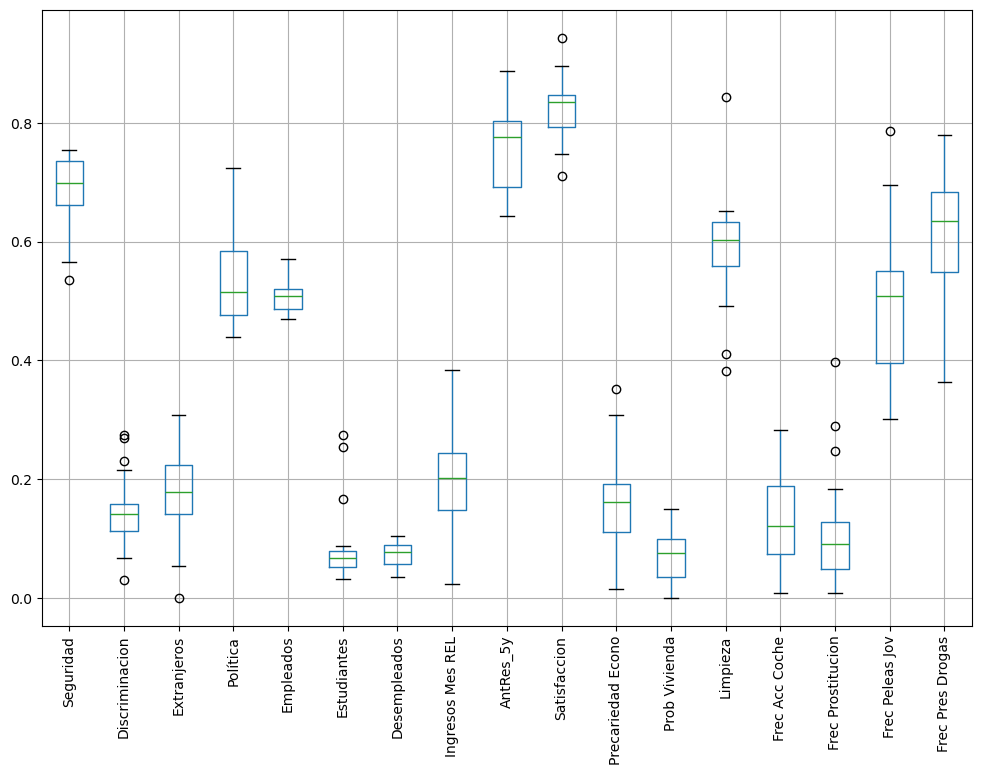

In [24]:

# Boxplots
df.boxplot(figsize=(12, 8))
#girar las etiquetas 90 grados
plt.xticks(rotation=90)
plt.show()


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

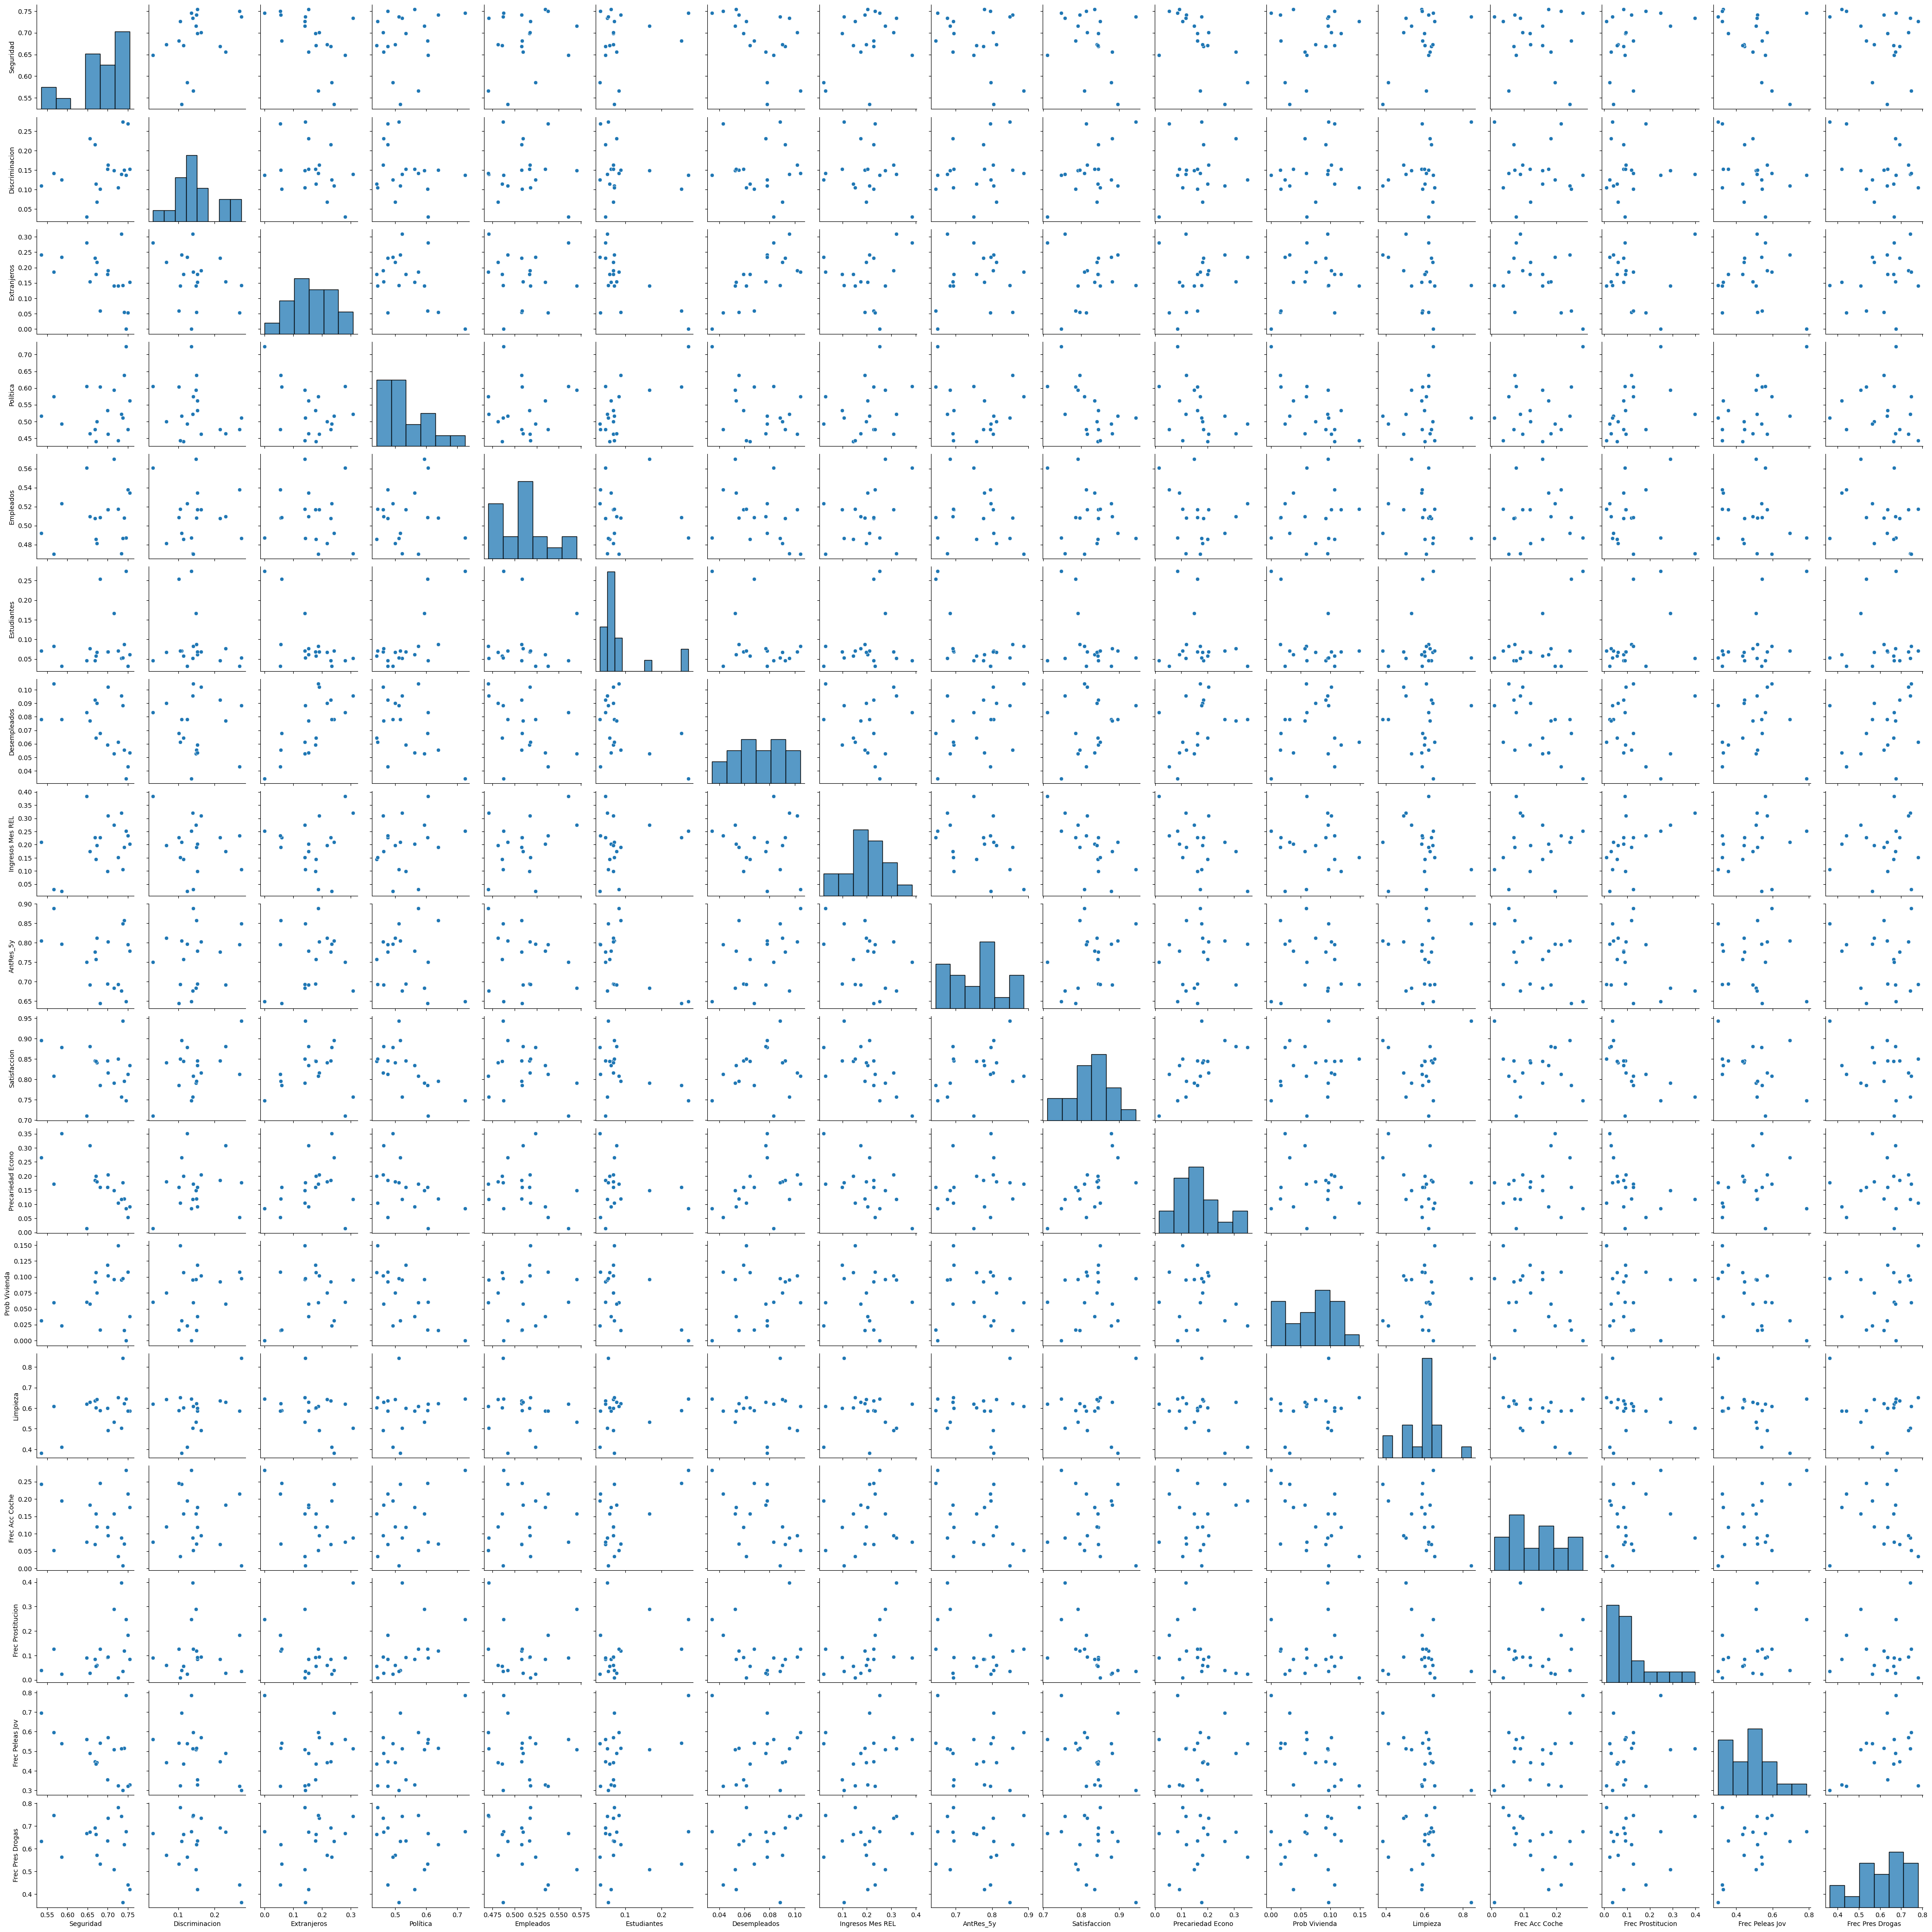

In [25]:

# Scatter plots
sns.pairplot(df)
plt.show()



In [26]:
# cargar en un dataframe el documento de jesus

df_jesus = pd.read_csv('docs_Carlos/distritosAyuntamiento_2023.csv')
# Los valores de la columna ´Distrito´ son de tipo string. Los ponemos en minúsculas y sin tildes. Eliminamos los números y los puntos
df_jesus['Distrito'] = df_jesus['Distrito'].str.lower()
df_jesus['Distrito'] = df_jesus['Distrito'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
# modifica cada string de la columna 'Distrito' para que empiece por el número de la posición en la lista y un espacio. Debe empezar en 1
df_jesus['Distrito'] = df_jesus['Distrito'].str.replace('. ', ' ')
df_jesus['Distrito'] = df_jesus['Distrito'].str.replace(' ', '_')
#cambiar las "_" por " " en los string de Distrito
df_jesus['Distrito'] = df_jesus['Distrito'].str.replace('_', ' ')

#indexar desde valor 1 en todas las filas
df_jesus.index = np.arange(1, len(df_jesus) + 1)

#eliminar la última columna
df_jesus = df_jesus.iloc[:, :-1]
#eliminar la columna "Código distrito" y la columna "Distrito"
df_jesus = df_jesus.iloc[:, 2:]

# hacer minmax excaler a todas las columnas (copia del dataframe)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_jesus_escal = df_jesus.copy()
df_jesus_escal[df_jesus.columns] = scaler.fit_transform(df_jesus[df_jesus.columns])

df_jesus




,Personas,Superficie (hm²),Densidad de población (p / hm²),Porcentaje +65 años,Edad media,Índice de envejecimiento,Índice de sobreenvejecimiento,Índice de estructura de la población activa,Porcentaje de población extranjera,Tasa bruta de natalidad,Tasa bruta de mortalidad,Tasa bruta de emigración intraurbana,Tasa bruta de emigración interurbana,Tasa general de fecundidad,Período de mayor construcción de inmuebles,Sup. construida media (m²),Valor catastral máxima frecuencia (miles euros),Valor por m²,Coeficiente derecha - izquierda
1,28763.0,168.985,170.210374,20.165658,44.566667,171.683333,17.200000,117.116667,23.700000,45.600000,103.816667,11.416667,55.166667,45.966667,1935.833333,122.777660,73.666667,504.081523,1.963074
2,43565.0,173.319,251.357324,23.970437,45.833333,170.233333,19.400000,134.800000,12.266667,40.566667,60.633333,10.000000,45.266667,27.900000,1943.333333,140.623032,67.333333,616.036472,3.802905
3,49335.0,197.169,250.216819,22.191162,45.475000,175.200000,19.375000,127.600000,17.450000,43.525000,75.600000,10.225000,51.025000,35.075000,1920.000000,113.403003,80.000000,491.626363,1.423521
4,39846.0,523.778,76.074215,23.489702,45.400000,183.200000,14.625000,137.125000,19.175000,43.700000,63.375000,7.925000,43.525000,38.125000,1978.750000,106.183619,44.000000,442.062998,1.117609
5,47499.0,194.391,244.347732,23.198932,45.880000,185.780000,17.620000,127.160000,17.740000,42.440000,63.360000,11.200000,45.440000,34.700000,1970.000000,100.438590,32.400000,372.342184,0.958173
6,30680.0,169.296,181.221057,24.461370,44.450000,154.400000,16.425000,108.925000,10.175000,40.750000,54.300000,9.700000,46.675000,28.350000,1975.000000,138.111878,73.500000,638.134024,3.388603
7,49584.0,198.880,249.316171,21.063360,44.820000,165.140000,18.880000,126.760000,21.940000,44.760000,75.260000,11.280000,39.680000,48.120000,1970.000000,94.573562,26.400000,339.068317,0.955987
8,58333.0,287.264,203.064080,21.432930,45.400000,175.420000,12.540000,144.480000,11.320000,42.140000,45.040000,8.100000,36.420000,29.820000,1970.000000,109.470099,44.400000,412.463723,0.945001
9,52585.0,298.461,176.187174,20.824373,44.940000,167.380000,13.500000,142.620000,16.620000,40.900000,55.840000,9.700000,37.940000,33.740000,1970.000000,102.079126,40.200000,362.409969,0.954247
10,76572.0,1132.522,67.611932,19.966008,44.128571,143.157143,15.500000,136.814286,17.300000,52.971429,65.671429,9.614286,40.571429,33.085714,1977.857143,112.564585,46.428571,385.316458,1.239696


In [27]:
# junta los dos dataframes por orden de filas
df_conjunto_NO_escal = pd.concat([df, df_jesus], axis=1)
df_conjunto = pd.concat([df, df_jesus_escal], axis=1)

df_conjunto

,Distrito,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,...,Tasa bruta de natalidad,Tasa bruta de mortalidad,Tasa bruta de emigración intraurbana,Tasa bruta de emigración interurbana,Tasa general de fecundidad,Período de mayor construcción de inmuebles,Sup. construida media (m²),Valor catastral máxima frecuencia (miles euros),Valor por m²,Coeficiente derecha - izquierda
1,ciutat vella,0.715789,0.149123,0.140351,0.593814,0.570175,0.166667,0.052632,0.274123,0.684211,...,0.101519,1.000000,1.000000,1.000000,0.893505,0.234568,0.343237,0.881841,0.657448,0.381105
2,l'eixample,0.741270,0.150794,0.055556,0.638938,0.507937,0.087302,0.055556,0.190873,0.857143,...,0.084343,0.332438,0.689781,0.737068,0.000000,0.345679,0.560412,0.763682,0.943533,1.000000
3,extramurs,0.754198,0.152672,0.152672,0.562037,0.534351,0.061069,0.053435,0.202290,0.778626,...,0.094438,0.563804,0.739051,0.890003,0.354847,0.000000,0.229150,1.000000,0.625621,0.199606
4,campanar,0.699153,0.152542,0.177966,0.533708,0.516949,0.067797,0.059322,0.099364,0.694915,...,0.095035,0.374821,0.235401,0.690812,0.505687,0.870370,0.141292,0.328358,0.498968,0.096701
5,la saidia,0.535156,0.109375,0.242188,0.516071,0.492188,0.070312,0.078125,0.210000,0.804688,...,0.090735,0.374589,0.952555,0.741672,0.336301,0.740741,0.071376,0.111940,0.320807,0.043069
6,el pla del real,0.745299,0.136752,0.000000,0.724138,0.487179,0.273504,0.034188,0.252564,0.649573,...,0.084968,0.234532,0.624088,0.774472,0.022255,0.814815,0.529851,0.878731,1.000000,0.860634
7,l'olivereta,0.668462,0.215385,0.230769,0.476106,0.507692,0.046154,0.092308,0.227500,0.776923,...,0.098652,0.558548,0.970073,0.588694,1.000000,0.740741,0.000000,0.000000,0.235780,0.042333
8,patraix,0.734559,0.139706,0.308824,0.521774,0.470588,0.051471,0.095588,0.320037,0.676471,...,0.089712,0.091384,0.273723,0.502112,0.094955,0.740741,0.181287,0.335821,0.423332,0.038638
9,jesus,0.672932,0.067669,0.218045,0.500000,0.481203,0.067669,0.090226,0.197932,0.812030,...,0.085480,0.258339,0.624088,0.542481,0.288823,0.740741,0.091341,0.257463,0.295427,0.041748
10,10. quatre carreres,0.700680,0.163265,0.190476,0.462069,0.517007,0.068027,0.102041,0.309354,0.802721,...,0.126673,0.410321,0.605318,0.612369,0.256465,0.857143,0.218947,0.373667,0.353961,0.137769


In [28]:
df_completo = df_conjunto.copy()
df_completo

,Distrito,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,...,Tasa bruta de natalidad,Tasa bruta de mortalidad,Tasa bruta de emigración intraurbana,Tasa bruta de emigración interurbana,Tasa general de fecundidad,Período de mayor construcción de inmuebles,Sup. construida media (m²),Valor catastral máxima frecuencia (miles euros),Valor por m²,Coeficiente derecha - izquierda
1,ciutat vella,0.715789,0.149123,0.140351,0.593814,0.570175,0.166667,0.052632,0.274123,0.684211,...,0.101519,1.000000,1.000000,1.000000,0.893505,0.234568,0.343237,0.881841,0.657448,0.381105
2,l'eixample,0.741270,0.150794,0.055556,0.638938,0.507937,0.087302,0.055556,0.190873,0.857143,...,0.084343,0.332438,0.689781,0.737068,0.000000,0.345679,0.560412,0.763682,0.943533,1.000000
3,extramurs,0.754198,0.152672,0.152672,0.562037,0.534351,0.061069,0.053435,0.202290,0.778626,...,0.094438,0.563804,0.739051,0.890003,0.354847,0.000000,0.229150,1.000000,0.625621,0.199606
4,campanar,0.699153,0.152542,0.177966,0.533708,0.516949,0.067797,0.059322,0.099364,0.694915,...,0.095035,0.374821,0.235401,0.690812,0.505687,0.870370,0.141292,0.328358,0.498968,0.096701
5,la saidia,0.535156,0.109375,0.242188,0.516071,0.492188,0.070312,0.078125,0.210000,0.804688,...,0.090735,0.374589,0.952555,0.741672,0.336301,0.740741,0.071376,0.111940,0.320807,0.043069
6,el pla del real,0.745299,0.136752,0.000000,0.724138,0.487179,0.273504,0.034188,0.252564,0.649573,...,0.084968,0.234532,0.624088,0.774472,0.022255,0.814815,0.529851,0.878731,1.000000,0.860634
7,l'olivereta,0.668462,0.215385,0.230769,0.476106,0.507692,0.046154,0.092308,0.227500,0.776923,...,0.098652,0.558548,0.970073,0.588694,1.000000,0.740741,0.000000,0.000000,0.235780,0.042333
8,patraix,0.734559,0.139706,0.308824,0.521774,0.470588,0.051471,0.095588,0.320037,0.676471,...,0.089712,0.091384,0.273723,0.502112,0.094955,0.740741,0.181287,0.335821,0.423332,0.038638
9,jesus,0.672932,0.067669,0.218045,0.500000,0.481203,0.067669,0.090226,0.197932,0.812030,...,0.085480,0.258339,0.624088,0.542481,0.288823,0.740741,0.091341,0.257463,0.295427,0.041748
10,10. quatre carreres,0.700680,0.163265,0.190476,0.462069,0.517007,0.068027,0.102041,0.309354,0.802721,...,0.126673,0.410321,0.605318,0.612369,0.256465,0.857143,0.218947,0.373667,0.353961,0.137769


In [29]:
from sklearn.decomposition import PCA

df_completo_numeros = df_completo.copy()
df_completo_numeros.drop(['Distrito'], axis=1, inplace=True)

pca_completo = PCA(n_components=0.80)
pca_completo.fit(df_completo_numeros)
df_pca_completo = pca_completo.transform(df_completo_numeros)

In [30]:
#importar px
import plotly.express as px

fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], width=1000, height=1000)

fig.show()


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting

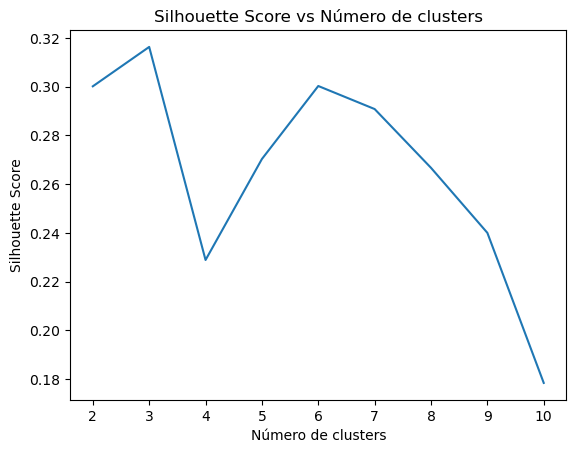

In [31]:
# Calcular el número optimo de clusters con silhouette_score

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=98)
    kmeans.fit(df_pca_completo)
    silhouette_scores.append(silhouette_score(df_pca_completo, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Número de clusters')
plt.show()



In [32]:
# Vemos que el número óptimo de clusters es 5
from sklearn.cluster import KMeans

df_clases = []
df_clases = pd.DataFrame(df_clases)
kmeans = KMeans(n_clusters=5,random_state=98)
kmeans.fit(df_pca_completo)
df_clases['Cluster'] = kmeans.labels_


c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Carlo\anaconda3\envs\NLP_3.10\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [33]:
df_clases['Cluster_name'] = df_clases['Cluster'].map({2: 'turístico', 1: 'multicultural', 0: 'comercial', 4: 'familiar', 3: 'histórico'})


# Representamos los datos en 3D (debe poder girarse, usaremos plotly). Cada punto debe mostrar su nombre (distrito) y su cluster

fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], color=df_clases['Cluster_name'], width=1000, height=1000)


fig.show()


# JESUS, DE AQUÍ LA FIGURA DE LA PRESENTACIÓN // BENNET 

In [34]:
# cargar en un dataframe el documento mostSimilarDf_5zero.csv
df_Bert = pd.read_csv('docs_carlos/distritosClasificacionDef.csv', sep=';', header=None)
#transponer el dataframe
df_Bert = df_Bert.T
#convertir a dataframe
df_Bert = pd.DataFrame(df_Bert)
#renombrar la columna 0 como "Dsitrito"
df_Bert.rename(columns={0:'Distrito'}, inplace=True)
#renombrar la columna 1 como "Etiqueta"
df_Bert.rename(columns={1:'Etiqueta'}, inplace=True)


df_Bert

,Distrito,Etiqueta
0,Ciutat Vella,histórico
1,L'Eixample,comercial
2,Extramurs,multicultural
3,Campanar,comercial
4,La Saidia,familiar
5,El Pla del Real,histórico
6,L'Olivereta,turístico
7,Patraix,multicultural
8,Jesus,multicultural
9,Quatre Carreres,comercial


In [35]:
df_completo

,Distrito,Seguridad,Discriminacion,Extranjeros,Política,Empleados,Estudiantes,Desempleados,Ingresos Mes REL,AntRes_5y,...,Tasa bruta de natalidad,Tasa bruta de mortalidad,Tasa bruta de emigración intraurbana,Tasa bruta de emigración interurbana,Tasa general de fecundidad,Período de mayor construcción de inmuebles,Sup. construida media (m²),Valor catastral máxima frecuencia (miles euros),Valor por m²,Coeficiente derecha - izquierda
1,ciutat vella,0.715789,0.149123,0.140351,0.593814,0.570175,0.166667,0.052632,0.274123,0.684211,...,0.101519,1.000000,1.000000,1.000000,0.893505,0.234568,0.343237,0.881841,0.657448,0.381105
2,l'eixample,0.741270,0.150794,0.055556,0.638938,0.507937,0.087302,0.055556,0.190873,0.857143,...,0.084343,0.332438,0.689781,0.737068,0.000000,0.345679,0.560412,0.763682,0.943533,1.000000
3,extramurs,0.754198,0.152672,0.152672,0.562037,0.534351,0.061069,0.053435,0.202290,0.778626,...,0.094438,0.563804,0.739051,0.890003,0.354847,0.000000,0.229150,1.000000,0.625621,0.199606
4,campanar,0.699153,0.152542,0.177966,0.533708,0.516949,0.067797,0.059322,0.099364,0.694915,...,0.095035,0.374821,0.235401,0.690812,0.505687,0.870370,0.141292,0.328358,0.498968,0.096701
5,la saidia,0.535156,0.109375,0.242188,0.516071,0.492188,0.070312,0.078125,0.210000,0.804688,...,0.090735,0.374589,0.952555,0.741672,0.336301,0.740741,0.071376,0.111940,0.320807,0.043069
6,el pla del real,0.745299,0.136752,0.000000,0.724138,0.487179,0.273504,0.034188,0.252564,0.649573,...,0.084968,0.234532,0.624088,0.774472,0.022255,0.814815,0.529851,0.878731,1.000000,0.860634
7,l'olivereta,0.668462,0.215385,0.230769,0.476106,0.507692,0.046154,0.092308,0.227500,0.776923,...,0.098652,0.558548,0.970073,0.588694,1.000000,0.740741,0.000000,0.000000,0.235780,0.042333
8,patraix,0.734559,0.139706,0.308824,0.521774,0.470588,0.051471,0.095588,0.320037,0.676471,...,0.089712,0.091384,0.273723,0.502112,0.094955,0.740741,0.181287,0.335821,0.423332,0.038638
9,jesus,0.672932,0.067669,0.218045,0.500000,0.481203,0.067669,0.090226,0.197932,0.812030,...,0.085480,0.258339,0.624088,0.542481,0.288823,0.740741,0.091341,0.257463,0.295427,0.041748
10,10. quatre carreres,0.700680,0.163265,0.190476,0.462069,0.517007,0.068027,0.102041,0.309354,0.802721,...,0.126673,0.410321,0.605318,0.612369,0.256465,0.857143,0.218947,0.373667,0.353961,0.137769


In [36]:
# Representamos los datos en 3D (debe poder girarse, usaremos plotly). Cada punto debe mostrar su nombre (distrito) y su cluster

#reducir tamaño del plot para que se vea bien
fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], color=df_Bert['Etiqueta'], width=1000, height=750)

fig.show()

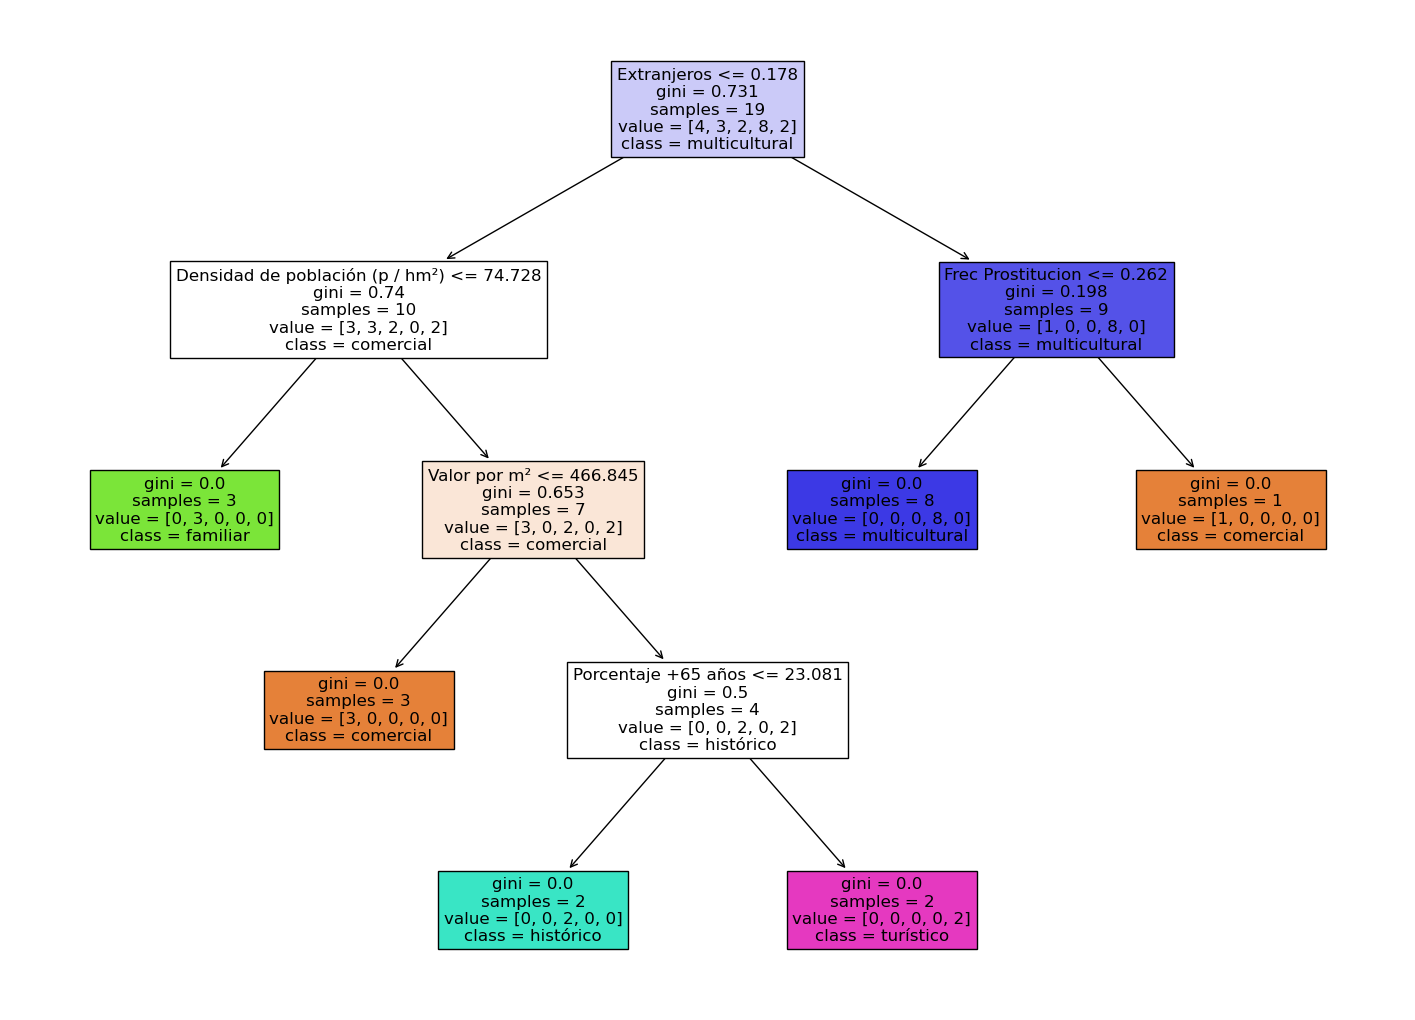

In [84]:
# hacemos un model de reglas que clasifique los distritos en función de las variables. tiene que llegar a la clasificación de df_clases['Cluster_name']. no usar train test split. no usar cross validation. solo hacer el modelo y predecir

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree



# contruir un dataframe que se llame df_reglas que contenga del dataframe df_completo las columnas: 
# Extranjeros, Período de mayor construcción de inmuebles, Ingresos Mes REL y Satisfaccion

df_reglas = df_conjunto_NO_escal.copy()
#eliminar las columnas: 'Personas'
df_reglas.drop(['Personas'], axis=1, inplace=True)
df_reglas.drop(['Porcentaje de población extranjera'], axis=1, inplace=True)
df_reglas.drop(['Tasa bruta de mortalidad'], axis=1, inplace=True)

df_reglas.drop(['Índice de envejecimiento'], axis=1, inplace=True)
df_reglas.drop(['Índice de sobreenvejecimiento'], axis=1, inplace=True)
df_reglas.drop(['Tasa bruta de emigración interurbana'], axis=1, inplace=True)
df_reglas.drop(['Tasa bruta de emigración intraurbana'], axis=1, inplace=True)
df_reglas.drop(['Tasa general de fecundidad'], axis=1, inplace=True)
df_reglas.drop(['Coeficiente derecha - izquierda'], axis=1, inplace=True)
df_reglas.drop(['AntRes_5y'], axis=1, inplace=True)
df_reglas.drop(['Índice de estructura de la población activa'], axis=1, inplace=True)
df_reglas.drop(['Sup. construida media (m²)'], axis=1, inplace=True)


X = df_reglas.drop(['Distrito'], axis=1)
y = df_clases['Cluster_name']

# Crea y entrena el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=14)
clf.fit(X, y)

# Convierte los nombres de características y clases a listas
# usa .inverse_transform(clf.classes_) para obtener las clases y que aparezca en el plot_tree
feature_names = X.columns.tolist()
class_names = clf.classes_.tolist()


# Grafica el árbol de decisión
# en vez de indicar value, poner el nombre de las clases
plt.figure(figsize=(18, 13))

# en vez de indicar value, poner el nombre de las clases

plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, fontsize=12)
plt.show()


In [38]:
# obtener las variables más importantes (dataframe)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
variables = X.columns

df_importances = pd.DataFrame({'Variable': variables[indices], 'Importancia': importances[indices]})

df_importances



,Variable,Importancia
0,Extranjeros,0.339478
1,Densidad de población (p / hm²),0.203571
2,Valor por m²,0.185065
3,Porcentaje +65 años,0.143939
4,Frec Prostitucion,0.127946
5,Precariedad Econo,0.000000
6,Discriminacion,0.000000
7,Política,0.000000
8,Empleados,0.000000
9,Estudiantes,0.000000


In [39]:
#construir un dataframe que se llame df_reglas que contenga las columnas Distritos, Extranjeros, Densidad de población (p / hm²), Valor por m², Porcentaje +65 años, Frec Prostitucion	del daraframe df_completo

# Supongamos que df_completo ya está definido y contiene las columnas mencionadas

# Crear un DataFrame seleccionando las columnas deseadas
df_reglas_importante = df_conjunto_NO_escal[['Distrito', 'Extranjeros', 'Densidad de población (p / hm²)', 'Valor por m²', 'Porcentaje +65 años', 'Frec Prostitucion']]

df_borrar = df_clases['Cluster_name']
# empezar en index 1
df_borrar.index = np.arange(1, len(df_borrar) + 1)
df_borrar = pd.DataFrame(df_borrar)

df_reglas_importante = pd.concat([df_reglas_importante, df_borrar], axis=1)

df_reglas_importante

# exportar a un dataframe las columnas Distritos, Extranjeros, Densidad de población, Frec Prostitución

,Distrito,Extranjeros,Densidad de población (p / hm²),Valor por m²,Porcentaje +65 años,Frec Prostitucion,Cluster_name
1,ciutat vella,0.140351,170.210374,504.081523,20.165658,0.289474,histórico
2,l'eixample,0.055556,251.357324,616.036472,23.970437,0.119048,turístico
3,extramurs,0.152672,250.216819,491.626363,22.191162,0.083969,histórico
4,campanar,0.177966,76.074215,442.062998,23.489702,0.093220,comercial
5,la saidia,0.242188,244.347732,372.342184,23.198932,0.039062,multicultural
6,el pla del real,0.000000,181.221057,638.134024,24.461370,0.247863,turístico
7,l'olivereta,0.230769,249.316171,339.068317,21.063360,0.084615,multicultural
8,patraix,0.308824,203.064080,412.463723,21.432930,0.397059,comercial
9,jesus,0.218045,176.187174,362.409969,20.824373,0.060150,multicultural
10,10. quatre carreres,0.190476,67.611932,385.316458,19.966008,0.095238,multicultural


In [40]:
df_reglas_importante.to_csv('docs_Carlos/df_variables_importantes.csv', index=False)

Modelo de reglas con el experto:

In [44]:
# crear un dataframe que sea: Tipo_Dist_real que contenga una columna con las siguientes etiquetas en este orden:
# histórico, comercial, multicultural, familiar, familiar, histórico, multicultural, multicultural, multicultural, turístico, turístico, famailiar, multicultural, multicultural, famliar, familiar, familiar, histórico, familiar

df_tipo_dist_real = pd.DataFrame({'Tipo_Dist_real': ['histórico', 'comercial', 'multicultural', 'familiar', 'familiar', 'histórico', 'multicultural', 'multicultural', 'multicultural', 'turístico', 'turístico', 'familiar', 'multicultural', 'multicultural', 'familiar', 'familiar', 'familiar', 'histórico', 'familiar']})


df_tipo_dist_real


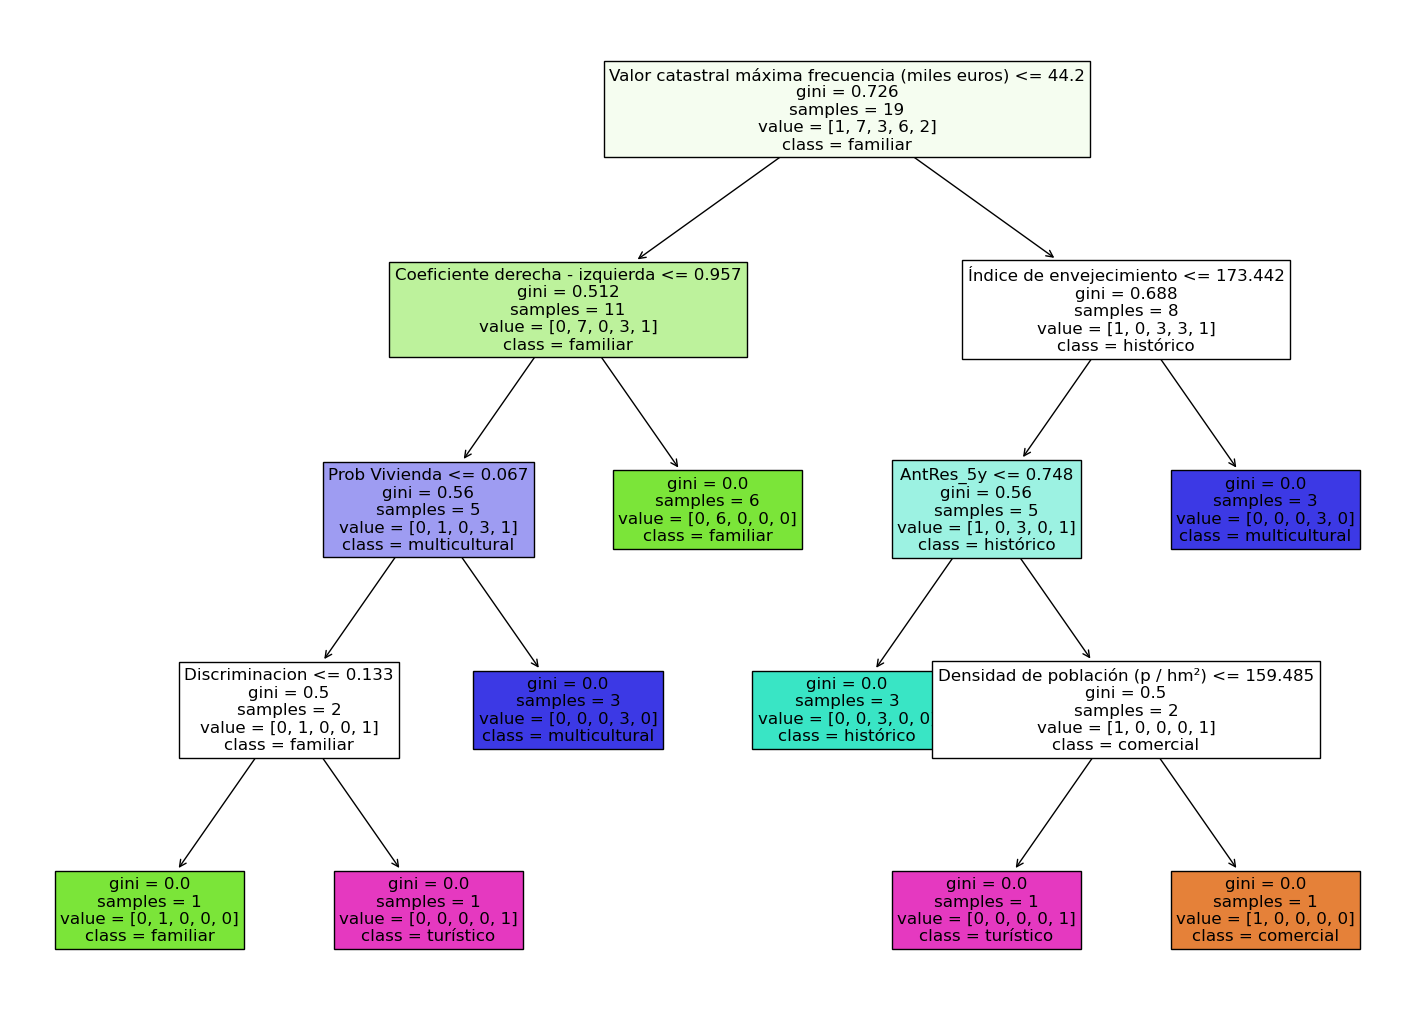

In [83]:
df_reglas2 = df_conjunto_NO_escal.copy()
#eliminar las columnas: 'Personas'


X = df_reglas2.drop(['Distrito'], axis=1)
y = df_tipo_dist_real

# Crea y entrena el modelo de árbol de decisión
clf = DecisionTreeClassifier(random_state=114)
clf.fit(X, y)

# Convierte los nombres de características y clases a listas
# usa .inverse_transform(clf.classes_) para obtener las clases y que aparezca en el plot_tree
feature_names = X.columns.tolist()
class_names = clf.classes_.tolist()


# Grafica el árbol de decisión
# en vez de indicar value, poner el nombre de las clases
plt.figure(figsize=(18, 13))

# en vez de indicar value, poner el nombre de las clases

plot_tree(clf, filled=True, feature_names=feature_names, class_names=class_names, fontsize=12)
plt.show()


In [66]:
# obtener las variables más importantes (dataframe)
importances_2 = clf.feature_importances_
indices_2 = np.argsort(importances_2)[::-1]
variables_2 = X.columns

df_importances_2 = pd.DataFrame({'Variable': variables_2[indices_2], 'Importancia': importances_2[indices_2]})

df_importances_2

,Variable,Importancia
0,Coeficiente derecha - izquierda,0.205690
1,Índice de envejecimiento,0.195802
2,Valor catastral máxima frecuencia (miles euros),0.192401
3,Prob Vivienda,0.130534
4,AntRes_5y,0.130534
5,Discriminacion,0.072519
6,Densidad de población (p / hm²),0.072519
7,Satisfaccion,0.000000
8,Frec Acc Coche,0.000000
9,Limpieza,0.000000


In [77]:
# Crear un DataFrame seleccionando las columnas deseadas
df_reglas_importante_2 = df_conjunto_NO_escal[['Distrito', 'Valor catastral máxima frecuencia (miles euros)', 'Densidad de población (p / hm²)', 'Coeficiente derecha - izquierda', 'Índice de envejecimiento', 'Prob Vivienda', 'AntRes_5y', 'Discriminacion']]

df_borrar = df_tipo_dist_real
# empezar en index 1
df_borrar.index = np.arange(1, len(df_borrar) + 1)
df_borrar = pd.DataFrame(df_borrar)

df_reglas_importante_2 = pd.concat([df_reglas_importante_2, df_borrar], axis=1)
# quitar el "10." de la primera columna de la instancia 10
df_reglas_importante_2.iloc[9, 0] = df_reglas_importante_2.iloc[9, 0][3:]

df_reglas_importante_2


,Distrito,Valor catastral máxima frecuencia (miles euros),Densidad de población (p / hm²),Coeficiente derecha - izquierda,Índice de envejecimiento,Prob Vivienda,AntRes_5y,Discriminacion,Tipo_Dist_real
1,ciutat vella,73.666667,170.210374,1.963074,171.683333,0.096491,0.684211,0.149123,histórico
2,l'eixample,67.333333,251.357324,3.802905,170.233333,0.015873,0.857143,0.150794,comercial
3,extramurs,80.000000,250.216819,1.423521,175.200000,0.038168,0.778626,0.152672,multicultural
4,campanar,44.000000,76.074215,1.117609,183.200000,0.118644,0.694915,0.152542,familiar
5,la saidia,32.400000,244.347732,0.958173,185.780000,0.031250,0.804688,0.109375,familiar
6,el pla del real,73.500000,181.221057,3.388603,154.400000,0.000000,0.649573,0.136752,histórico
7,l'olivereta,26.400000,249.316171,0.955987,165.140000,0.092308,0.776923,0.215385,multicultural
8,patraix,44.400000,203.064080,0.945001,175.420000,0.095588,0.676471,0.139706,multicultural
9,jesus,40.200000,176.187174,0.954247,167.380000,0.075188,0.812030,0.067669,multicultural
10,quatre carreres,46.428571,67.611932,1.239696,143.157143,0.102041,0.802721,0.163265,turístico


In [78]:
df_reglas_importante_2.to_csv('docs_Carlos/df_reglas_experto_reales.csv', index=False)


In [86]:
fig = px.scatter_3d(x=df_pca_completo[:, 0], y=df_pca_completo[:, 1], z=df_pca_completo[:, 2], text=df['Distrito'], color=df_reglas_importante_2['Tipo_Dist_real'], width=1000, height=750)

fig.show()